In [1]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libxext-dev is already the newest version (2:1.3.3-1).
libxext-dev set to manually installed.
libxft-dev is already the newest version (2.3.2-1).
binutils is already the newest version (2.30-21ubuntu1~18.04.2).
binutils set to manually installed.
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
g++ set to manually installed.
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gcc set to manually installed.
gfortran is already the newest version (4:7.4.0-1ubuntu2.3).
git is already the newest version (1:2.17.1-1ubuntu0.4).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.2).
libx11-dev set to manually installed.
tar is already the newest version (1.29b-2ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The followin

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!tar -xf /content/drive/Shared\ drives/PyROOT_in_Google/root_build_google_yikes.tar

In [0]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")


In [5]:
import ROOT

Welcome to JupyROOT 6.14/04


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


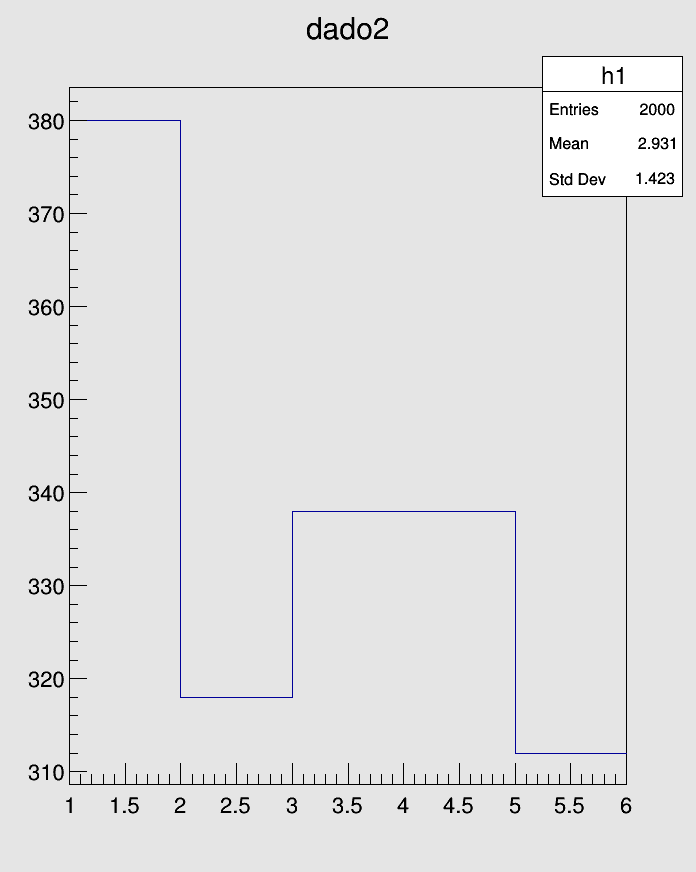

In [7]:
from array import array
from ROOT import TCanvas, TPad, TFormula, TF1, TPaveLabel, TH1F, TFile, TPaveText
MyTree = ROOT.TTree( 'tree1', 'tree para un par de dados' )
dado1 = array( 'i', [ 0 ] )
dado2 = array( 'i', [ 0 ] )
dado2p= array("f", [0])
MyTree.Branch( 'dado 1', dado1, 'dado1/I' )
MyTree.Branch( 'dado 2', dado2, 'dado2/I' )
MyTree.Branch("dado 2 prima", dado2p, "dado2p/F")


import random
from random import randint

#with one seed we caxll randint multiple times and it generates  diferent seeds automatically
for i in range(1000): #entradas o eventos
  dado1[0] = randint(1,6)
  dado2[0] = randint(1,6)
  #print(dado2[0])
  MyTree.Fill()


#trying to fill with random numbers with dado2 as seed
for j in range(1000):
  MyTree.GetEntry(j)
  #print(MyTree.dado2)
  random.seed(MyTree.dado2)
  dado2p[0]= randint(1,6)
  #print(dado2p[0])
  MyTree.Fill()

"""
N =  MyTree.GetEntries()
for i in range(N):
    MyTree.GetEntry(i)
    print (MyTree.dado2)
"""

c1 = ROOT.TCanvas( 'c1', 'My First Data example', 200, 10, 700, 900 )
c1.SetFillColor( 18 )
MyTree.Draw("dado2>>h1(5,1,6)")
c1.Update()
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()






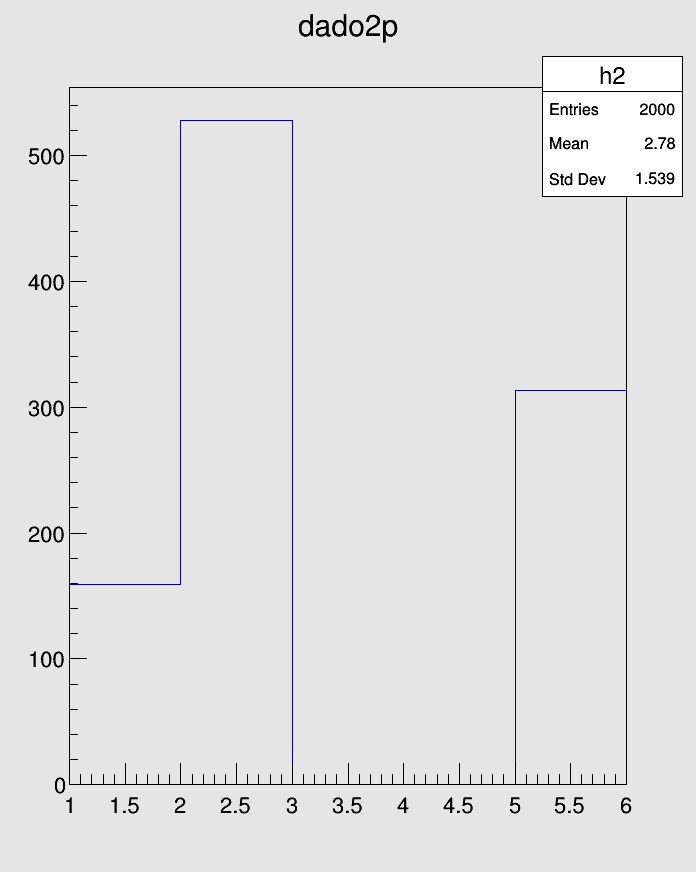

In [8]:
MyTree.Draw("dado2p>>h2(5,1,6)")
c1.Update()
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


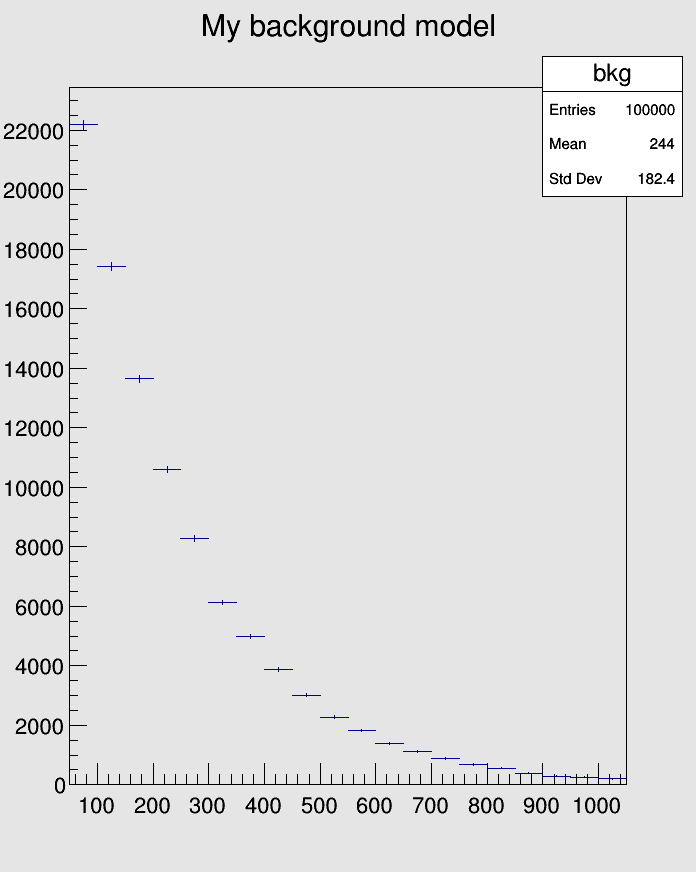

In [9]:
import numpy as np
c1 = ROOT.TCanvas( 'c1', 'My First Data example', 200, 10, 700, 900 )
c1.SetFillColor( 18 )

#B model
BackgroundModel = ROOT.TH1F( 'bkg', 'My background model', 20, 50, 1050 )
expde = ROOT.TF1("expde","([2]*expo)+[3]",50,1050)
expde.SetParameters(0.0,-0.005,100,0.0);
BackgroundModel.FillRandom("expde",100000)
BackgroundModel.Draw('E')
c1.Update()
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()


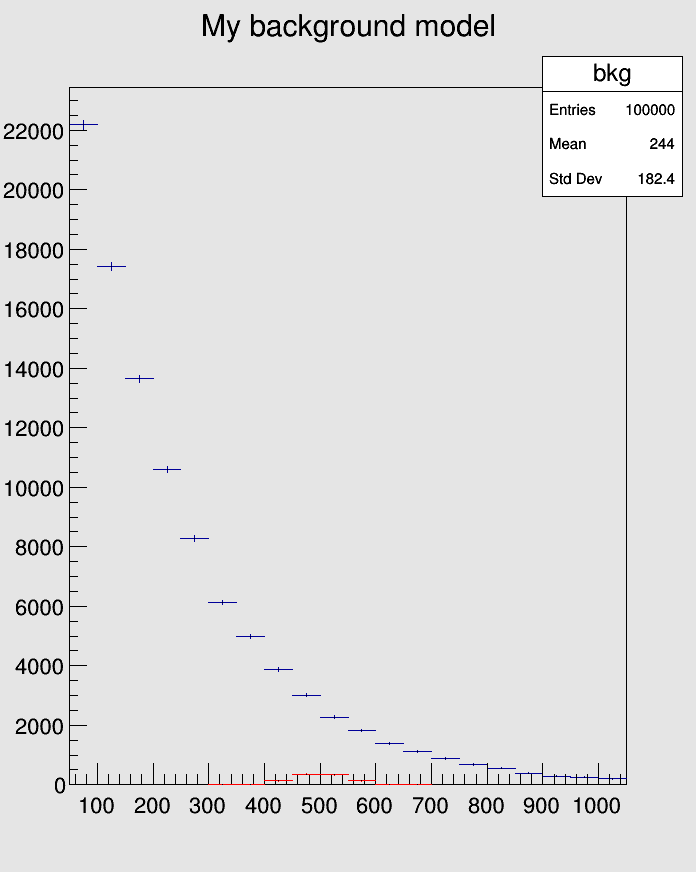

In [10]:
#S model
SignalModel = ROOT.TH1F( 'sig', 'My signal model', 20, 50, 1050 )
signal = ROOT.TF1("signal", "gaus", 50, 1050)
signal.SetParameters(1.0,500.0,50.0)
SignalModel.FillRandom("signal",1000)
SignalModel.Draw('same E')
SignalModel.SetLineColor(2)
c1.Update()
gROOT.GetListOfCanvases().Draw()

In [0]:
#the histogram from the root file to do the fit
DataFile = ROOT.TFile("/content/drive/Shared drives/PyROOT_in_Google/Data5.root","read")
DataHisto=DataFile.Get('data')
#DataHisto.Draw("E")
#c1.Update()
#gROOT.GetListOfCanvases().Draw()

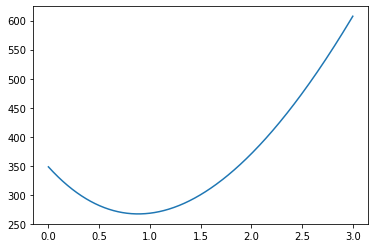

'\nBkgpSigModel.SetLineColor(40)\nBackgroundModel.Draw("E")\nSignalModel.Draw("E same")\nBkgpSigModel.Draw("E same")\nc1.Update()\ngROOT.GetListOfCanvases().Draw()\n'

In [17]:
import matplotlib.pyplot as plt
N=1000 #Numero de entradas del histograma
chi2allu=[]
for u in np.arange(0.,3.,0.0001):
    chi2=0 #empieza desde 0 para cada valor de u que es el parametro #unico cambio realizado desde la ultima entrega /( y el rango del for)
    #adding both Models
    BkgpSigModel = BackgroundModel.Clone("bkgpsig")
    BkgpSigModel.Sumw2()
    BkgpSigModel.Add(SignalModel,u)

    for l in range(N):
       if (BkgpSigModel.GetBinContent(l)!=0):
           chi2+=(DataHisto.GetBinContent(l)-BkgpSigModel.GetBinContent(l))**2/BkgpSigModel.GetBinContent(l)
    chi2allu.append(chi2)
plt.plot(np.arange(0.,3.,0.0001),chi2allu)
plt.show()
"""
BkgpSigModel.SetLineColor(40)
BackgroundModel.Draw("E")
SignalModel.Draw("E same")
BkgpSigModel.Draw("E same")
c1.Update()
gROOT.GetListOfCanvases().Draw()
"""